# Моделирование случайных величин

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

##  Непрерывное распределение

Дано распределение Рэлея: 

$
\begin{align}
p(x) = \frac{x}{\sigma^2} \cdot \exp(\frac{-x^2}{2 \cdot \sigma^2}), x>=0, \sigma>0 \\
m = \sigma \cdot \sqrt{\frac{\pi}{2}} \\
D = (2 - \frac{\pi}{2})\cdot \sigma^2\\
\sigma\sim\sigma \cdot \sqrt{-2\cdot\ln{\alpha}}
\end{align}
$

In [2]:
n = 10000 #число реализаций равномерной случайной величины
r = np.random.uniform(size=n) #генерируем реализации РСВ

In [3]:
sigma = 2 
x = sigma * np.sqrt(-2*np.log(r)) # генерируем реализации СВ на основе алгоритма

In [4]:
# вычисление выборочного среднего
def sample_mean(x):
    if type(x) == list:
        n = len(x)
    else:
        n = x.shape[0]
    X = np.vstack([x]*n)
    X_ = np.tril(X)
    ms = X_.sum(1)/ N 
    return ms

In [5]:
N = list(range(1,n+1)) #числа реализаций
ms = sample_mean(x) 
m = sigma * math.sqrt(math.pi/2)# матожидание

In [6]:
def plot_mean(m,ms):
    N = list(range(1,len(ms)+1))
    plt.plot(N,ms,'r',label = 'Выборочное среднее')
    plt.axhline(m,color = 'g', label = 'Матожидание')
    plt.xlabel('Число реализаций СВ')
    plt.ylabel('Значения выборочного среднего')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

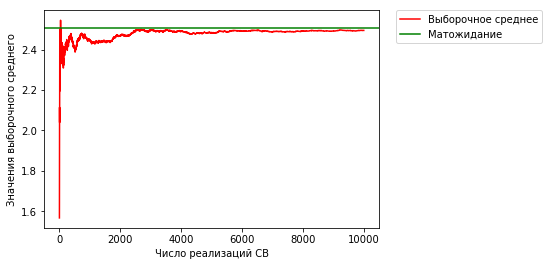

In [7]:
plot_mean(m,ms)

In [8]:
# вычисление выборочной дисперсии
def sample_variance(x):
    if type(x) == list:
        n = len(x)
    else:
        n = x.shape[0]
    X = np.vstack([x]*n)
    ms = sample_mean(x)
    vd = np.tril(np.square(X - ms)).sum(1)/N
    return vd

In [9]:
vd = sample_variance(x)
d = (2 - math.pi/2)*sigma**2 

In [10]:
def plot_variance(d,vd):
    N = list(range(1,len(vd)+1))
    plt.plot(N,vd,'r',label = 'Выборочная дисперсия')
    plt.axhline(d,color = 'g', label = 'Дисперсия')
    plt.xlabel('Число реализаций СВ')
    plt.ylabel('Значения выборочной дисперсии')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

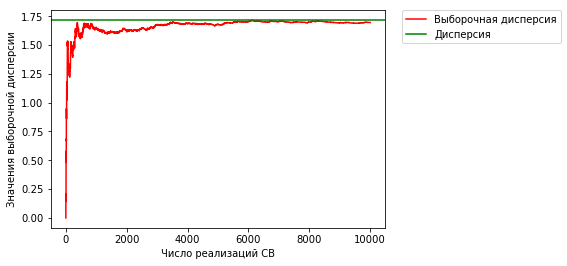

In [11]:
plot_variance(d,vd)

In [12]:
t=np.arange(np.min(x),np.max(x),0.05)
p = t/(sigma**2) * np.exp(-(t**2)/(2*sigma**2)) #плотность вероятности

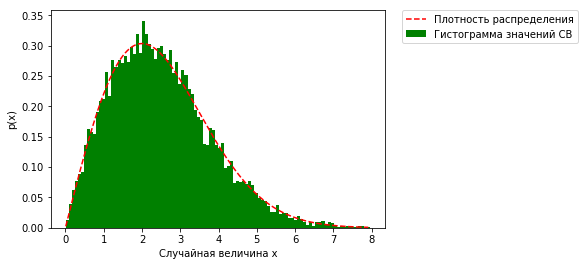

In [13]:
plt.hist(x,normed = 1, facecolor = 'green', label = 'Гистограмма значений СВ', bins = 100)
plt.plot(t,p,'r--',label = 'Плотность распределения')
plt.xlabel('Случайная величина x')
plt.ylabel('p(x)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Дискретное распределение

Дано распределение Пуассона:

$
\begin{align}
p(x) = \frac{\lambda^x  \cdot exp(- \lambda)}{!x}, x \in \{0,1,2,...\} \\
m = \lambda\\
D = \lambda
\end{align}
$

Алгоритм генерации:

$
\begin{align}
\lambda \sim x,\\x \in \{0,1,2,...\} \\ 
F(x) \leq \alpha < F(x+1),\\
F(x) = \sum\limits_{i=1}^n \frac{\lambda^i \cdot exp(-\lambda)}{!i}
\end{align}
$

Воспользуемся алгоритмом генерации по Кнуту:

In [14]:
def generate_poisson(l):
    k=0
    prod = np.random.uniform()
    expRate = math.exp(-l)
    while prod>expRate:
        prod *= np.random.uniform()
        k+=1
    return k

In [15]:
n = 10000 #число сгенерированных величин
L = 4 #лямбда
values = [generate_poisson(L) for i in range(n)]#сгенерированные величины

In [16]:
#вычисление вероятности
def p(L,x):
    return L**x*math.exp(-L)/math.factorial(x) 

In [17]:
s_values = set(values) # множество значений
all_p = [p(L,x) for x in s_values] #вероятность для каждого

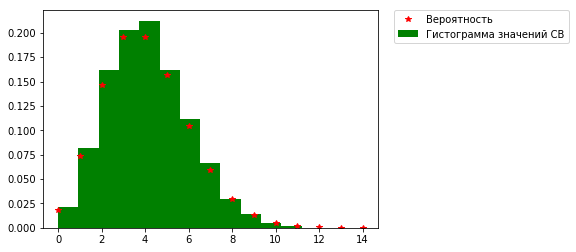

In [18]:
plt.plot(list(s_values),all_p,'r*', label = 'Вероятность')
plt.hist(values, normed = 1, bins = len(s_values),color = 'green',label = 'Гистограмма значений СВ')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [19]:
m = L 
d = L

In [20]:
ms = sample_mean(values) 

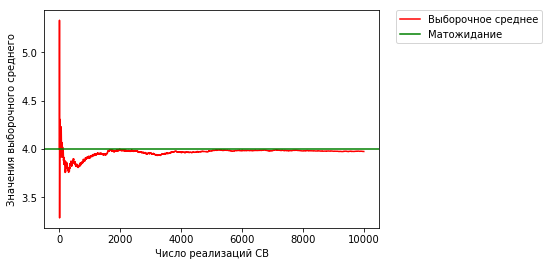

In [21]:
plot_mean(m,ms)

In [22]:
vd = sample_variance(values) 

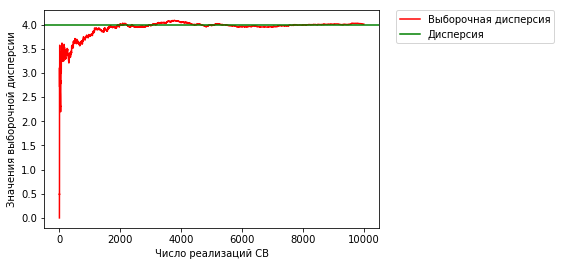

In [23]:
plot_variance(d, vd)